# MACHINE LEARNING ASSIGNMENT : GROUP 23


## Executive Summary
This study investigates gender disparities in skills-related underemployment (SRU) in Malaysia, analyzing trends using linear regression and principal component analysis (PCA). Skills-related underemployment affects Malaysia because qualified individuals often find themselves working jobs which do not require their advanced skills especially for women.

The Department of Statistics Malaysia (DOSM) data serves as the basis for research that establishes SRU as the outcome variable while time (in quarters), gender, and employment variables act as independent variables. Linear regression data shows that SRU measured at higher rates among male workers than female workers throughout the studied time period. The R-squared value indicates time serves as a better predictor for female SRU trends than male underemployment due to its higher rate of 0.847 as compared to 0.789.

The PCA further highlights differences in SRU patterns between genders. The first principal component explains more than 94% of male underemployment variation and over 96% of female underemployment variation which confirms that primary underemployment trends receive clear representation. Males exhibit more scattered and less stable trends, while females display a more linear and stable pattern, implying a consistent underemployment trend over time for women.

This analysis underscores that gender disparities in SRU are not only evident in growth rates but also in trend stability, with male SRU influenced by fluctuating factors and female SRU maintaining steadiness. Additional research on the topic should include examinations of education level distributions and economic conditions as well as different job sector distributions. The application of K-means clustering and other machine learning approaches would produce enhanced understanding of employment trends in order to develop gender-focused policies fighting underemployment inequalities.

This study emphasizes the critical need to address skills-related underemployment in Malaysia, particularly focusing on gender-based variations, to ensure equitable employment opportunities and efficient utilization of skills in the workforce.




## Gender Disparities in Skills-Related Underemployment in Malaysia: A Trend Analysis

Before we dive in, understanding underemployment requires us to clarify its definition before conducting any analysis. Skills-related underemployment occurs when individuals with advanced skills or qualifications (like a degree) are employed in jobs that don't utilize those skills, often low-paying or low-skilled positions that don't typically require such qualifications.  Time-related underemployment, on the other hand, refers to situations where individuals are willing and able to work more hours than they are currently employed.  Essentially, they are working fewer hours than they desire.

In Malaysia, the country faces a significant gender gap in underemployment, particularly concerning the utilization of skills. Studies show women are more likely than men to face both time-related and skill-related underemployment conditions. This disparity is further compounded by higher rates of underemployment among women in the informal sector, where income disparities compared to formally employed workers are also greater ([Article Reference](https://thesun.my/opinion-news/silent-struggle-impacting-our-workforce-KM11597085))

This research underscores the gender disparities in skills-related underemployment as a notable issue in Malaysia.  Therefore, this project investigates the following key question:

> **"Is there a significant gender disparity in skills-related underemployment trends across different time periods?"**

This research explores the development of gender gap in skills-related underemployment through an analysis of established patterns and trends.  This investigation seeks to provide insights that could inform policy interventions and contribute to addressing this persistent challenge.

Dataset Reference: https://open.dosm.gov.my/data-catalogue/lfs_qtr_sru_sex

# 1. Exploring the Dataset

## Google Drive, Data Setup, and Data Cleaning

In [25]:
#GOOGLE DRIVE SETUP
from google.colab import drive
import os

drive.mount('/content/drive')
notebook_path = r"/content/drive/MyDrive/MLAssignmentAndLab/MyPart"

os.chdir(notebook_path)
!pwd

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/MLAssignmentAndLab/MyPart


In [26]:
#LIBRARY IMPORTS AND DATASET LOADING
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
import plotly.graph_objects as go


# Load the dataset
underemployment_filepath = '/content/drive/MyDrive/MLAssignmentAndLab/MyPart/lfs_qtr_sru_sex.csv'

df1 = pd.read_csv(underemployment_filepath)
df2 = df1
df3 = df1

In [27]:
# EXPLORING DATASET
print("Dataset Overview:")
print(df1.head())
print("\nDataset Info:")
df1.info()

#This section shows the columns, the range index, data columns, data types,
#memory usage

Dataset Overview:
         date variable      sex   sru
0  2017-01-01     rate  overall  29.9
1  2017-04-01     rate  overall  31.8
2  2017-07-01     rate  overall  31.4
3  2017-10-01     rate  overall  32.7
4  2018-01-01     rate  overall  32.5

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      186 non-null    object 
 1   variable  186 non-null    object 
 2   sex       186 non-null    object 
 3   sru       186 non-null    float64
dtypes: float64(1), object(3)
memory usage: 5.9+ KB


In [28]:
#CHECK FOR MISSING VALUES
print("\nMissing Values:")
print(df1.isnull().sum())
df1 = df1.dropna()

"""
This part of the code ensures that there is no missing values
in the dataset. Last line drops rows/columsn with significant
#missing values if necessary.
"""


Missing Values:
date        0
variable    0
sex         0
sru         0
dtype: int64


'\nThis part of the code ensures that there is no missing values\nin the dataset. Last line drops rows/columsn with significant\n#missing values if necessary.\n'

## Setting Our Variables





For our variables, we will be setting "SRU" as our dependent variable, and for our independent variable (features), it will be our quarter index (based on time). For our SRU, we will instead take the rate of the people instead of the number of people (by gender) in SRU.  

In [29]:
# Drop rows where 'sex' is 'Overall' first
df1 = df1[df1['sex'] != 'overall']

# Drop rows where 'variable' is 'Rate' (ensure correct capitalization)
df1 = df1[df1['variable'] != 'rate']

# Convert date into numerical quarter index
df1['date'] = pd.to_datetime(df1['date']) # converts 'date' column to datetime format
df1['quarter_num'] = df1['date'].dt.to_period("Q").astype('category').cat.codes #Convert date into quarter period and assign unique numerical index



# Define X and Y
X = df1.drop(columns=['sex', 'variable'])
X = df1['quarter_num']
y = df1['sru']  #--> target varaible

# Reshape X into a 2D array
X = df1['quarter_num'].values.reshape(-1, 1)



In [30]:
#CHECK IF DATASET IS FILTERED
print('dataset for y --> sru')
print(y)
print("----------------------------------------------")
print(X)


dataset for y --> sru
124    567.0
125    584.9
126    623.9
127    648.4
128    629.2
       ...  
181    981.4
182    940.9
183    955.7
184    961.8
185    956.1
Name: sru, Length: 62, dtype: float64
----------------------------------------------
[[ 0]
 [ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [11]
 [12]
 [13]
 [14]
 [15]
 [16]
 [17]
 [18]
 [19]
 [20]
 [21]
 [22]
 [23]
 [24]
 [25]
 [26]
 [27]
 [28]
 [29]
 [30]
 [ 0]
 [ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [11]
 [12]
 [13]
 [14]
 [15]
 [16]
 [17]
 [18]
 [19]
 [20]
 [21]
 [22]
 [23]
 [24]
 [25]
 [26]
 [27]
 [28]
 [29]
 [30]]


Instead of displaying the x-axis (date) in date format, it'll be hard for us, so what we decided was to display the date by quarters. You can refer to the table below.

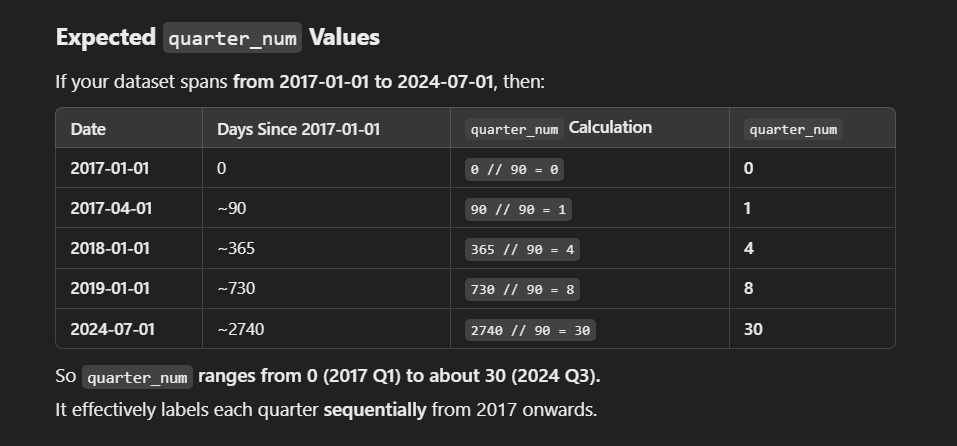

In [31]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

# 2. Linear Regression Model



We believe that the best approach to see the significant trends would be by first using a Linear Regression model, where it will predict a continuous variable (like SRU), and see if there is a linear relationship between independent and dependent variables.

### Labelling Coefficient of Determination, Intercept, Slope, and Predicted Response

In [32]:
#Filter data by gender first
df1_female = df1[df1['sex'] == 'female']
df1_male = df1[df1['sex'] == 'male']

#FEMALE
# Prepare X and y for female dataset
X_female = df1_female['quarter_num'].values.reshape(-1, 1)
y_female = df1_female['sru'].values

# Prepare X and y for male dataset
X_male = df1_male['quarter_num'].values.reshape(-1, 1)
y_male = df1_male['sru'].values


# Generate LR models for both genders
model_female = LinearRegression()
model_male = LinearRegression()
# Fit models
model_female.fit(X_female, y_female)
model_male.fit(X_male, y_male)

# Get R^2 scores (or known as coeff of determinatino)
r_sq_female = model_female.score(X_female, y_female)
r_sq_male = model_male.score(X_male, y_male)


In [33]:
#Print female graph details
print("FEMALE GRAPH INFORMATION")
print(f"coefficient of determination: {r_sq_female}")
print(f"intercept: {model_female.intercept_}")
print(f"slope: {model_female.coef_}")

print("\n\nMALE GRAPH INFORMATION")
#Print male graph details
print(f"coefficient of determination: {r_sq_male}")
print(f"intercept: {model_male.intercept_}")
print(f"slope: {model_male.coef_}")

FEMALE GRAPH INFORMATION
coefficient of determination: 0.8469271983778232
intercept: 679.2802419354839
slope: [11.50024194]


MALE GRAPH INFORMATION
coefficient of determination: 0.7889949381890112
intercept: 605.2562499999998
slope: [14.50076613]


### Plot Results, Display Graph, and Analysis

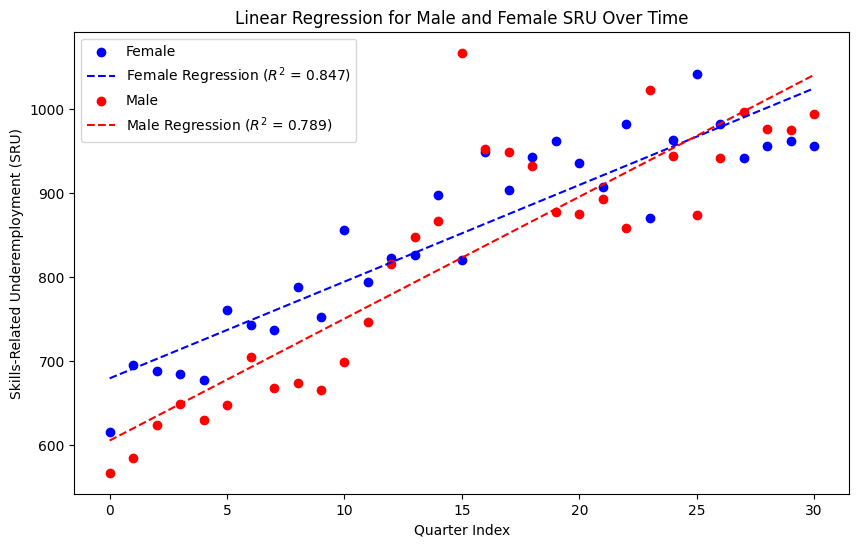

In [34]:
# Predict y values for both genders
y_pred_female = model_female.predict(X_female)
y_pred_male = model_male.predict(X_male)

# Plot results
plt.figure(figsize=(10, 6))

plt.scatter(X_female, y_female, color="blue", label="Female")
plt.plot(X_female, y_pred_female, color="blue", linestyle="dashed", label=f"Female Regression ($R^2$ = {r_sq_female:.3f})")

plt.scatter(X_male, y_male, color="red", label="Male")
plt.plot(X_male, y_pred_male, color="red", linestyle="dashed", label=f"Male Regression ($R^2$ = {r_sq_male:.3f})")

plt.xlabel('Quarter Index')
plt.ylabel('Skills-Related Underemployment (SRU)')
plt.title('Linear Regression for Male and Female SRU Over Time')
plt.legend()
plt.show()


## Analysis of Skills-Related Underemployment (SRU) Trends by Gender

This analysis examines trends in skills-related underemployment (SRU) for males and females using binary logistic regression with time (quarter index) as the predictor.

---

### 1. Comparison of Slopes (Coefficients)

* **Observation:** The slope (coefficient) of the regression line for males is considerably steeper than that for females.

* **Interpretation:** This indicates a faster increase in SRU over time for males compared to females.  In simpler terms, men are experiencing a more rapid growth in skills-related underemployment during the observed period.

---

### 2. Differences in R-squared (Coefficient of Determination)

* **Female R-squared:** 0.847.  This signifies that 84.7% of the variance in female SRU can be explained by the quarter index (time).

* **Male R-squared:** 0.789. This signifies that 78.9% of the variance in male SRU can be explained by the quarter index (time).

* **Interpretation:**

    * Time is a slightly stronger predictor of SRU trends for females than for males.
    * The lower R-squared for males suggests that other factors beyond time may be influencing male SRU.  These could include industry shifts, changes in required skillsets, education levels, economic conditions, and other factors.

---

### 3. Intercept Comparison

* **Description:** The intercept of the regression line represents the predicted SRU value when the quarter index is zero (the starting point of the observed time period).  Comparing the intercepts for males and females provides insight into the initial differences in SRU levels between the genders at the beginning of the data collection period.

* **Interpretation:**  A higher intercept for one gender indicates a higher starting level of SRU at the beginning of the observation period. The difference between the intercepts represents the initial gap in SRU between males and females.


#3. PCA

To dive deeper, and reveal more hidden trends (if any), we can use PCA, or Principal Component Analysis.

In [35]:
df_male = df1[df1['sex'] == 'male'].drop(columns=['sex', 'variable', 'date'])
df_female = df1[df1['sex'] == 'female'].drop(columns=['sex', 'variable', 'date'])

scaler = StandardScaler()
X_male_scaled = scaler.fit_transform(df_male)
X_female_scaled = scaler.fit_transform(df_female)

pca_male = PCA(n_components=2)
pca_female = PCA(n_components=2)

X_male_pca = pca_male.fit_transform(X_male_scaled)
X_female_pca = pca_female.fit_transform(X_female_scaled)

print("Explained Variance Ratio (Males):", pca_male.explained_variance_ratio_)
print("Explained Variance Ratio (Females):", pca_female.explained_variance_ratio_)



Explained Variance Ratio (Males): [0.94412694 0.05587306]
Explained Variance Ratio (Females): [0.96014324 0.03985676]


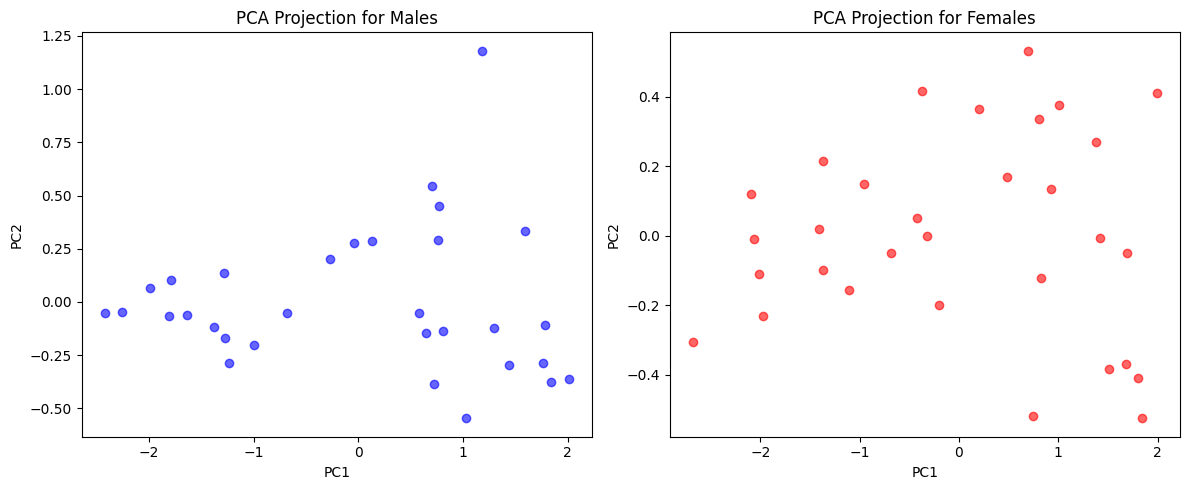

In [36]:
plt.figure(figsize=(12,5))

# Male PCA Scatter Plot
plt.subplot(1, 2, 1)
plt.scatter(X_male_pca[:, 0], X_male_pca[:, 1], color='blue', alpha=0.6)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Projection for Males')

# Female PCA Scatter Plot
plt.subplot(1, 2, 2)
plt.scatter(X_female_pca[:, 0], X_female_pca[:, 1], color='red', alpha=0.6)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Projection for Females')

plt.tight_layout()
plt.show()


## Are there more trends hidden in the dataset?
### 1. Variance Explanation

* **Observation:** The spread along the x-axis (PC1) captures the most significant trends in the dataset. With PC2 capturing a smaller portion of the trends in the dataset.  

* **Interpretation:** The variance ratios indicate that most of the variance (over 94% for males and 96% for females) is captured by the first principal component, with second principal component (PC2) capturing a smaller portion of the variance. <br>
Since PC2 contributes only around 4-6%, so variations along the y-axis (PC2) are relatively minor and may represent noise or secondary patterns.

---

### 2. Comparisons between Males and Females
Males' data appears more structured, showing a looser pattern with a slightly upward curve in PC2.
<br>
Females' data is more evenly scattered without a noticeable trend, suggesting that the variance for females is more uniformly distirubted.
<br>
---

### 3. Possible Interpretation
If you were to compare PC1 and PC2's distribution, it suggest that skills-related underemployment in males follows a more predictable pattern, whereas for females, it varies more unpredictably. <br>
The spread along PC1 is similar for both genders, which could imply that dominant factors affecting underemployment are common to both groups.


# Conclusion and Future Work

## Conclusion

This study analyzed skills-related underemployment (SRU) trends by gender, using linear regression and principal component analysis (PCA). Through our findings, our research shows the growth differences of SRU rates together with data variance patterns alongside structural elements that affect men and women.

*   SRU Trends Over Time: Regression analysis revealed a steeper increase in SRU for males, which shows that men experiences a more rapid rise in underemployment compared to females. However, time is a slightly stronger predictor of SRU trends for female, as shown by their higher R-squared value.

*   PCA Observations: PC1 already captures around 94% of the variance for males, and 96% for females, which suggests that the primary trends in SRU are well represented. However, the males' graph shows a more scattered trends, while the female exhibit a more stable and linear pattern.

*   Gender-Specific Variations: The spread in males suggests predictable but unstable fluctuations in SRU as compared to females, where they demonstrate a more uniform variance, which implies a steady trend through the time period.

To conclude, the research data shows SRU varies between genders in its growth patterns as well as stability levels which suggests other potential factors affect male and female underemployment individually. The analysis establishes the reality of this issue to be valid.


---

## Future Work
To delve deeper into the trends and their underlying causes, future research can include:
1. Expanding Features Analysis: Incorporate other external factors like education levels, job sector distribution, economy shifts, and policy changes to explain the differences in SRU trends.
2. Applying more Models for Deeper Analysis: We could apply other machine learning models such as K-means to uncover more hidden data and its employment patterns.

Future evaluations adopting these approaches will develop stronger insights regarding skills-related underemployment as well as its distribution among different demographic groups.



## Reflection
The applied use of linear regression along with principal component analysis (PCA) to real data provided meaningful insights during the laboratory experience. The applied linear regression analysis showed a direct connection between time and skills-related underemployment which affected both male and female participants equally. Underemployment rates for males rose at a higher rate than females showing both trends to be more volatile but females maintaining consistent underemployment levels.

In addition to linear regression, PCA was instrumental in reducing the dimensionality of the dataset and revealing hidden patterns. PC1 captured most of the variance, with males showing scattered and less stable patterns, while females displayed a linear and more stable distribution. This highlighted the different trends and variances in underemployment between genders.

Moving forward, the analysis would be more enhanced if we were to include clustering algorithms such as K-means algorithm, and include external factors like education levels, to discover advanced patterns for better comprehension of skills-related underemployment developments.

This lab experience has significantly improved my analytical skills, and reinforcing the value of statistical techniques in addressing complex societal issues.